## Table of content:
* [1. Load data](#LoadData)
* [2. Data preprocessing](#DataPreprocessing)
* [3. Features and target](#FeaturesAndTarget)
* [4. Build models for Logistic Regression and K-NN](#BuildingModels)
* [5. Model Evaluation](#ModelEvaluation)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile
from yellowbrick.model_selection import ValidationCurve, LearningCurve
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stat
import pylab 
from sklearn.pipeline import Pipeline
import math
import time
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from yellowbrick.target import FeatureCorrelation

#import warnings
#import ipdb
#warnings.filterwarnings("error")
#import warnings
#warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

def plotFeatures(df_features, ncols, figsize):
    fNo = int(len(df_features.columns))
    nrows =int(fNo/ncols) 

    if(fNo%ncols != 0):
        nrows = nrows+1

    fig, axes = plt.subplots(ncols=ncols,nrows = nrows,  figsize=figsize)

    row = -1
    for i in range(0 , fNo):
        if(i%ncols == 0):
            row = row+1

        col = i% ncols    
        column = df_features.columns[i]
        sns.histplot(df_features[column], kde=True, stat="density", linewidth=0, ax=axes[row,col])    

    plt.show()

## 1. Load data <a class="anchor" id="LoadData"></a>
https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018

In [2]:
dfData = pd.read_csv("classification/2018_Financial_Data.csv")
dfData

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


## Describe dataset

In [3]:
dfData.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.346000e+03,4253.000000,4.207000e+03,4.328000e+03,4.155000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,...,4067.000000,4268.000000,4160.000000,4178.000000,4121.000000,4128.000000,4133.000000,4144.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.049504e+10,195.504906,1.508813e+10,7.682369e+09,9.330891e+08,3.661116e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,...,0.239653,2347.079237,4.688013,35.123904,5.612666,363.717734,0.823281,0.839647,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.501425e+07,0.000000,3.415500e+06,3.618903e+07,0.000000e+00,2.056226e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,...,0.000000,-0.048075,0.000000,-0.036700,-0.108600,-0.082850,0.000000,-0.004650,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.457878e+09,0.188500,1.297814e+09,9.767015e+08,1.450150e+07,4.117162e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,...,0.042050,0.185900,0.080050,0.160575,0.138400,0.115425,0.009700,0.167625,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


## 2. Data preprocessing <a class="anchor" id="DataPreprocessing"></a>

### 2.1. Convert categorical predictor

In [4]:
le = LabelEncoder()
dfData["Sector"] = le.fit_transform(dfData['Sector'])
dfData.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,2,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,4,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,9,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,9,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,7,44.757840,1


### 2.2. Select possible features
At this step we will select as possible features the 200+ financial indicators

In [5]:
dfData = dfData.rename(columns={"Unnamed: 0": "Symbol"})

features = dfData.drop(['Symbol', 'Class'], axis=1)
features = features.loc[:, ~features.columns.str.endswith('PRICE VAR [%]')]
features

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.1865,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,2
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,-0.1421,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,4
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.0592,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,9
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.0000,0.0000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,9
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.1408,-0.2619,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,NaN,0.0000,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,8
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.0000,0.0000,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,0
4389,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,NaN,0.0000,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,0
4390,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,NaN,NaN,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,7


### 2.3. Checking for null values

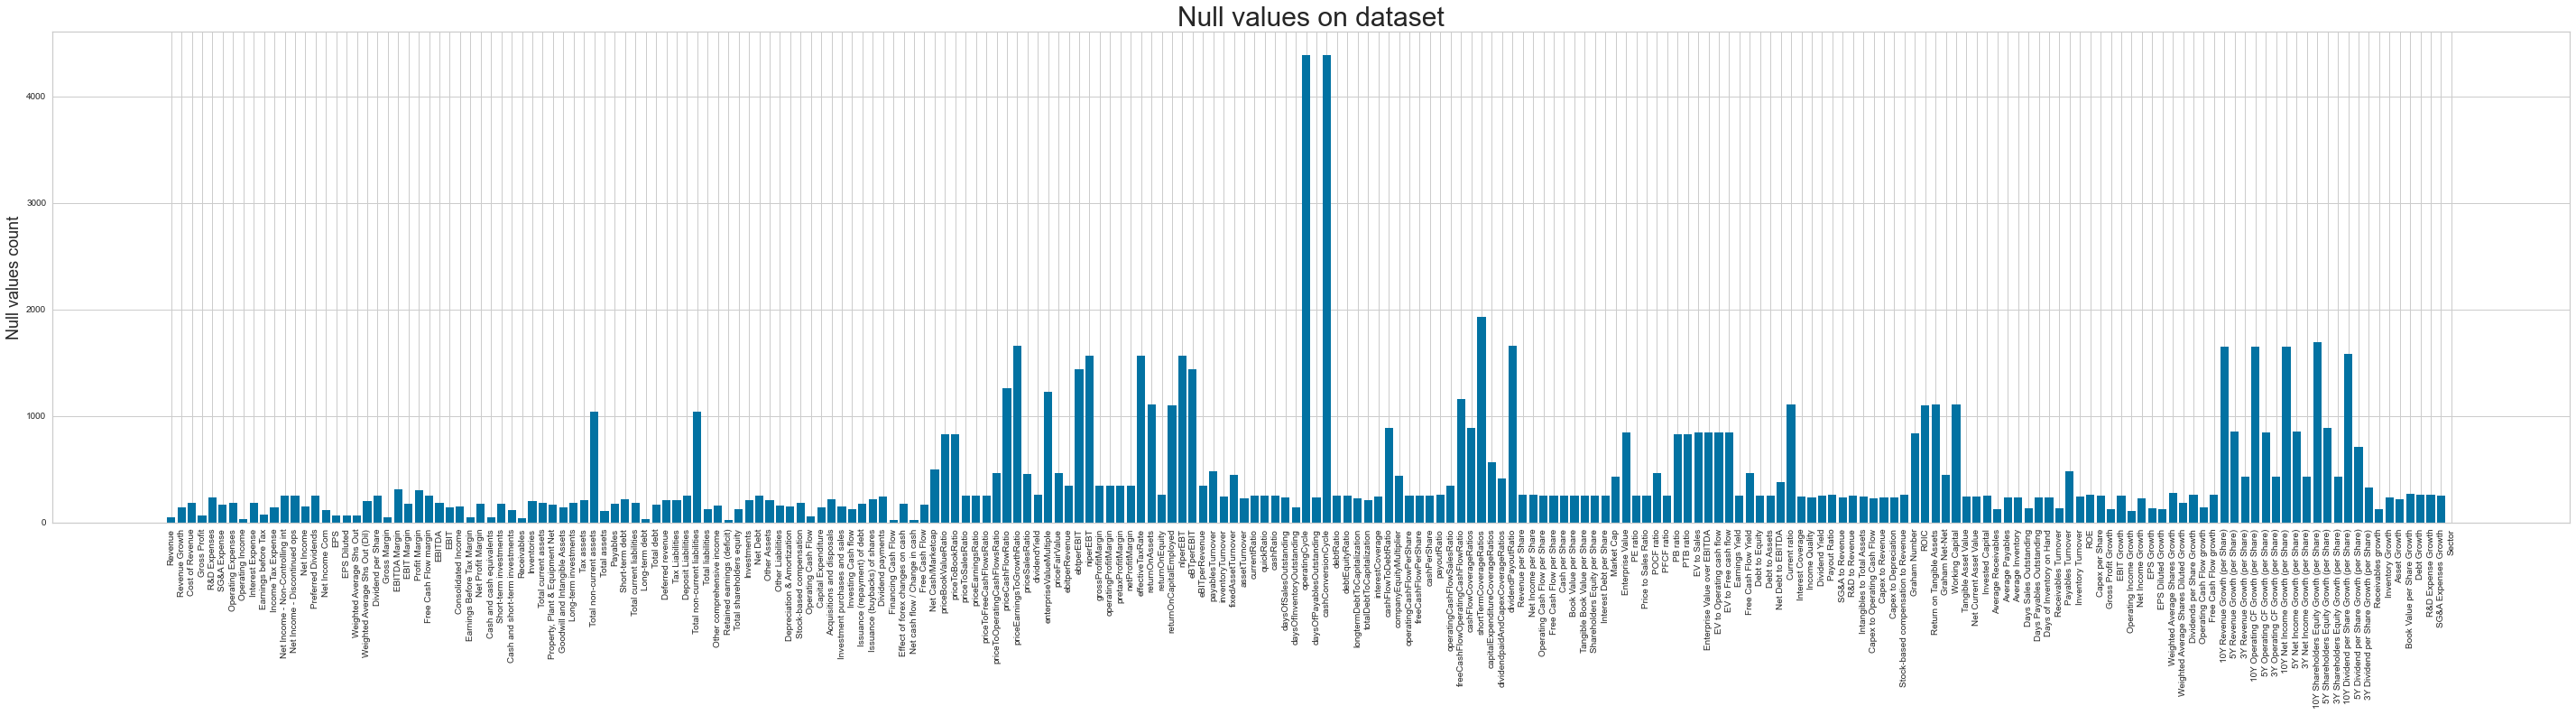

cashConversionCycle                           4386
operatingCycle                                4386
shortTermCoverageRatios                       1926
10Y Shareholders Equity Growth (per Share)    1695
priceEarningsToGrowthRatio                    1658
                                              ... 
Long-term debt                                  30
Net cash flow / Change in cash                  24
Retained earnings (deficit)                     21
Financing Cash Flow                             19
Sector                                           0
Length: 222, dtype: int64

In [6]:
null_vals = features.isnull().sum()
ind = np.arange(features.shape[1])

plt.figure(figsize=(50,10))

plt.title('Null values on dataset', fontsize=30)
plt.bar(ind, null_vals.values.tolist())
plt.ylabel('Null values count', fontsize=18)
plt.xticks(ind, null_vals.index.values, rotation='90')

plt.show()
null_vals.sort_values(ascending=False)

### 2.4. Fill missing values

In [7]:
features = features.fillna(features.mean())
features.isnull().sum().sort_values(ascending=False)

Revenue                           0
Earnings Yield                    0
Enterprise Value                  0
PE ratio                          0
Price to Sales Ratio              0
                                 ..
priceToSalesRatio                 0
priceEarningsRatio                0
priceToFreeCashFlowsRatio         0
priceToOperatingCashFlowsRatio    0
Sector                            0
Length: 222, dtype: int64

### 2.5. Handle outliers

In [8]:
features.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector
count,4.392000e+03,4392.000000,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,...,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,-0.010214,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,5.403916
std,2.038741e+10,192.385604,1.476686e+10,7.626177e+09,9.075586e+08,3.591246e+09,5.412730e+09,2.957483e+09,3.699974e+08,2.617902e+09,...,0.215222,0.230613,2313.701640,4.562486,34.257313,5.436709,352.614358,0.798632,0.815591,2.664811
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,0.000000
25%,6.584545e+07,0.000000,5.607401e+06,3.737700e+07,0.000000e+00,2.170000e+07,4.624375e+07,-5.199308e+06,0.000000e+00,-9.525389e+06,...,-0.010214,0.000000,-0.041800,0.000000,-0.032200,-0.095025,-0.070100,0.000000,0.000000,4.000000
50%,5.200504e+08,0.078800,2.070455e+08,2.384675e+08,0.000000e+00,1.040695e+08,2.017610e+08,4.366150e+07,7.534500e+06,2.967350e+07,...,0.000000,0.000000,0.017800,0.000000,0.042850,0.038800,0.000000,0.000000,0.073600,6.000000
75%,2.582760e+09,0.211475,1.680075e+09,1.049348e+09,2.787450e+07,5.074550e+08,8.257220e+08,3.019341e+08,7.798475e+07,2.509250e+08,...,0.000000,0.029025,0.214025,0.116325,0.201525,0.176275,0.186100,0.069625,0.155800,7.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,1.651400,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,10.000000


In [9]:
top_quantiles = features.quantile(0.97)
outliers_top = (features > top_quantiles)

low_quantiles = features.quantile(0.03)
outliers_low = (features < low_quantiles)

features = features.mask(outliers_top, top_quantiles, axis=1)
features = features.mask(outliers_low, low_quantiles, axis=1)

features.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector
count,4.392000e+03,4392.000000,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,...,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,3.447011e+09,0.280973,1.903653e+09,1.433024e+09,4.172300e+07,6.118199e+08,9.789564e+08,4.489860e+08,7.403177e+07,3.715572e+08,...,-0.016011,0.010019,1.409131,0.063801,0.178599,0.063181,0.812038,0.058280,0.114071,5.380692
std,7.274023e+09,0.761993,4.007634e+09,3.216910e+09,1.005097e+08,1.337686e+09,2.068914e+09,1.093613e+09,1.526632e+08,9.363789e+08,...,0.200516,0.132568,6.585410,0.207200,0.423923,0.428329,2.624454,0.190943,0.207726,2.628760
min,0.000000e+00,-0.396470,0.000000e+00,0.000000e+00,0.000000e+00,9.914621e+05,4.373218e+06,-1.792975e+08,0.000000e+00,-2.255230e+08,...,-1.000000,-0.499352,-0.627589,-0.349608,-0.362681,-0.855100,-0.884258,-0.300729,-0.218608,0.000000
25%,6.584545e+07,0.000000,5.607401e+06,3.737700e+07,0.000000e+00,2.170000e+07,4.624375e+07,-5.199308e+06,0.000000e+00,-9.525389e+06,...,-0.010214,0.000000,-0.041800,0.000000,-0.032200,-0.095025,-0.070100,0.000000,0.000000,4.000000
50%,5.200504e+08,0.078800,2.070455e+08,2.384675e+08,0.000000e+00,1.040695e+08,2.017610e+08,4.366150e+07,7.534500e+06,2.967350e+07,...,0.000000,0.000000,0.017800,0.000000,0.042850,0.038800,0.000000,0.000000,0.073600,6.000000
75%,2.582760e+09,0.211475,1.680075e+09,1.049348e+09,2.787450e+07,5.074550e+08,8.257220e+08,3.019341e+08,7.798475e+07,2.509250e+08,...,0.000000,0.029025,0.214025,0.116325,0.201525,0.176275,0.186100,0.069625,0.155800,7.000000
max,3.341463e+10,3.455278,1.840840e+10,1.578372e+10,4.882647e+08,6.518087e+09,1.009406e+10,5.147420e+09,6.992700e+08,4.334020e+09,...,0.267381,0.322770,36.768524,0.795521,1.389013,1.533425,9.928446,0.770423,0.796654,9.000000


## 3. Features and target <a class="anchor" id="FeaturesAndTarget"></a>
I will start with our target as it is required for filtering features based on mutual information.<br>

### 3.1. Target
Our target is the "Class" column which is a binary classification for each stock
* Class = 1: Stock that an hypothetical trader should BUY at the start of the year and sell at the end of the year for a profit.
* Class = 0: Stock that an hypothetical trader should NOT BUY, since their value will decrease, meaning a loss of capital.

In [10]:
target = dfData["Class"]

### 3.1. Filter features with greater Mutual Information (MI) 

In [11]:
selector = SelectPercentile(mutual_info_classif, percentile=5)
m = selector.fit(features, target)
filtered_features = selector.transform(features)

columns = np.asarray(features.columns.values)
support = np.asarray(selector.get_support())
columns_with_support = columns[support]
filtered_features = pd.DataFrame(filtered_features, columns = columns_with_support)

print("shape before mutual_info_classif: {}".format(features.shape))
print("shape after mutual_info_classif: {}".format(filtered_features.shape))

shape before mutual_info_classif: (4392, 222)
shape after mutual_info_classif: (4392, 12)


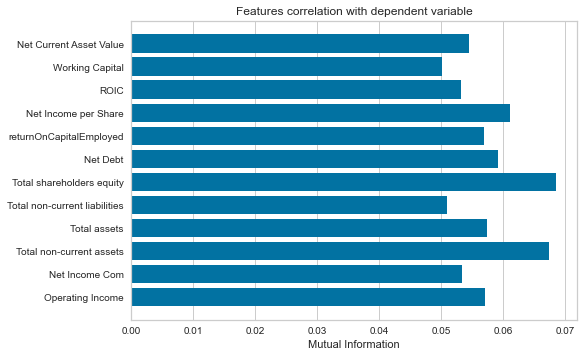

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [12]:
visualizer = FeatureCorrelation(method='mutual_info-classification', labels=filtered_features.columns)
visualizer.fit(filtered_features, target,  random_state=0)
visualizer.show()

### 3.2. Features

In [13]:
filtered_features

,Operating Income,Net Income Com,Total non-current assets,Total assets,Total non-current liabilities,Total shareholders equity,Net Debt,returnOnCapitalEmployed,Net Income per Share,ROIC,Working Capital,Net Current Asset Value
0,5.147420e+09,3.684560e+09,3.444534e+10,1.087810e+11,2.066577e+10,2.442986e+10,1.587504e+10,0.053100,2.5785,0.053100,-9.212497e+08,-3.946535e+10
1,3.794000e+09,1.481000e+09,3.444534e+10,7.886600e+10,2.066577e+10,2.442986e+10,1.587504e+10,0.033900,0.7261,0.033900,-9.212497e+08,-3.794700e+10
2,5.147420e+09,3.684560e+09,3.444534e+10,1.087810e+11,2.066577e+10,2.442986e+10,1.470900e+10,0.144400,4.5658,0.144400,7.820450e+09,-2.461300e+10
3,5.147420e+09,3.684560e+09,2.733700e+10,4.337600e+10,4.358000e+09,2.442986e+10,-1.199844e+09,0.305200,12.2700,0.305200,7.820450e+09,7.053877e+08
4,-1.792975e+08,-2.187800e+08,6.064651e+09,1.087810e+11,3.425384e+09,2.442986e+10,1.587504e+10,-0.484180,-2.5701,-0.484180,7.820450e+09,-3.946535e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
4387,-3.755251e+06,-1.371648e+07,6.064651e+09,3.860471e+08,3.425384e+09,1.714122e+08,1.172880e+08,-0.484180,-0.0796,-0.484180,7.820450e+09,1.647768e+08
4388,-9.274000e+06,-9.170000e+06,6.583000e+06,1.324857e+07,5.621000e+06,5.698000e+06,3.640000e+05,-0.956200,-0.9232,-0.956200,4.736000e+06,-8.850000e+05
4389,9.617636e+06,7.018114e+06,1.205139e+07,7.639856e+07,0.000000e+00,3.704184e+07,1.073711e+07,0.126900,0.5157,0.126900,2.521620e+07,2.521620e+07
4390,-1.664863e+07,-1.664769e+07,2.172561e+06,1.324857e+07,0.000000e+00,3.657000e+06,-1.940265e+06,-2.445815,-0.1782,-2.445815,1.484439e+06,1.484439e+06


In [14]:
filtered_features.describe()

,Operating Income,Net Income Com,Total non-current assets,Total assets,Total non-current liabilities,Total shareholders equity,Net Debt,returnOnCapitalEmployed,Net Income per Share,ROIC,Working Capital,Net Current Asset Value
count,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4392.000000,4392.000000,4392.000000,4.392000e+03,4.392000e+03
mean,4.489860e+08,3.139039e+08,4.408458e+09,9.630731e+09,2.556080e+09,2.433281e+09,1.411817e+09,-0.218377,1048.190382,-0.218377,2.373079e+09,-3.622195e+09
std,1.093613e+09,7.902104e+08,7.235305e+09,2.199626e+10,4.283881e+09,5.086539e+09,3.428582e+09,0.528096,3968.092934,0.528096,3.409363e+09,8.240091e+09
min,-1.792975e+08,-2.187800e+08,9.587300e+05,1.324857e+07,0.000000e+00,-3.583083e+07,-1.199844e+09,-2.445815,-7.498695,-2.445815,-9.212497e+08,-3.946535e+10
25%,-5.199308e+06,-1.041550e+07,1.005465e+08,2.700150e+08,3.344419e+07,8.477850e+07,-2.948650e+07,-0.484180,-0.289625,-0.484180,2.643854e+07,-2.935924e+09
50%,4.366150e+07,2.708496e+07,1.304361e+09,1.471882e+09,7.945720e+08,4.544207e+08,8.448450e+07,0.000000,0.959450,0.000000,2.552100e+08,-2.359330e+08
75%,3.019341e+08,2.361738e+08,6.064651e+09,6.769876e+09,3.425384e+09,2.016903e+09,1.266153e+09,0.067125,3.251350,0.067125,7.820450e+09,1.946125e+07
max,5.147420e+09,3.684560e+09,3.444534e+10,1.087810e+11,2.066577e+10,2.442986e+10,1.587504e+10,0.320440,16391.288273,0.320440,7.820450e+09,7.053877e+08


## 4. Normalisation

### 4.1. Visualize features before normalisation

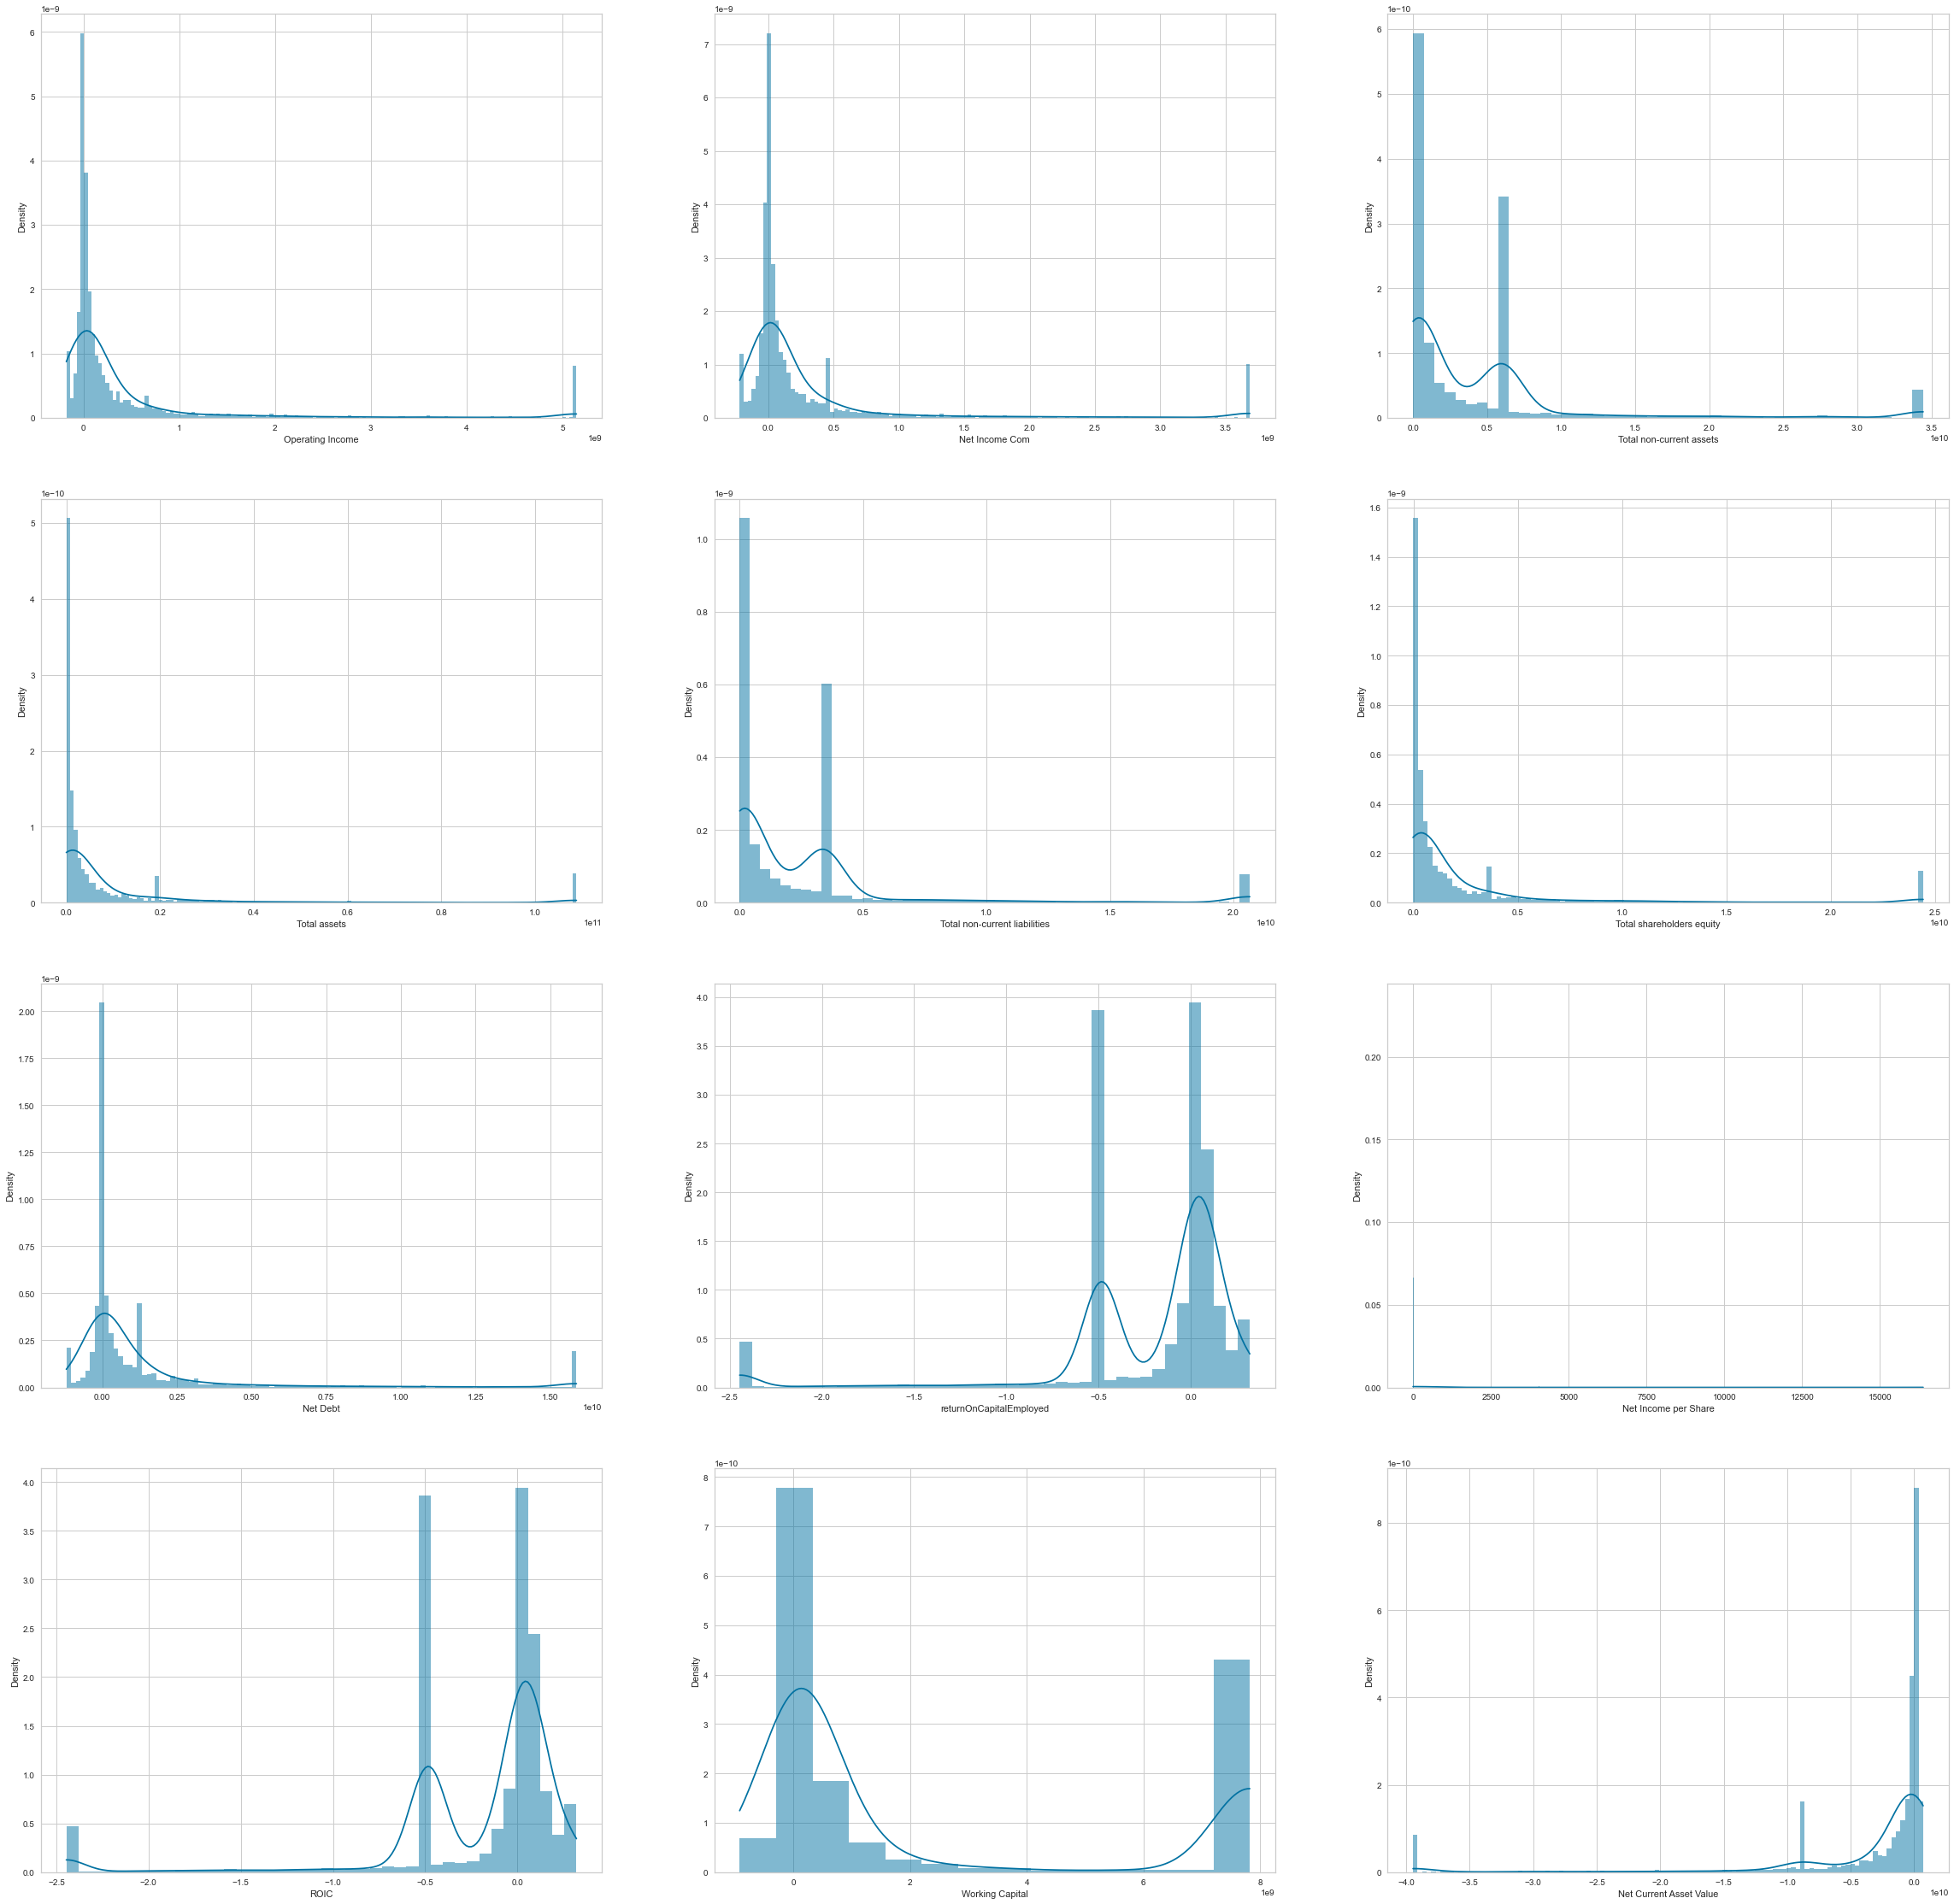

In [15]:
plotFeatures(filtered_features, 3,(40, 40))

### 4.2. Apply Normalisation

QuantileTransformer (gaussian)

In [16]:
df_scaled = QuantileTransformer(output_distribution="normal").fit_transform(filtered_features)
df_scaled = pd.DataFrame(df_scaled, columns = filtered_features.columns)

### Post normalisation

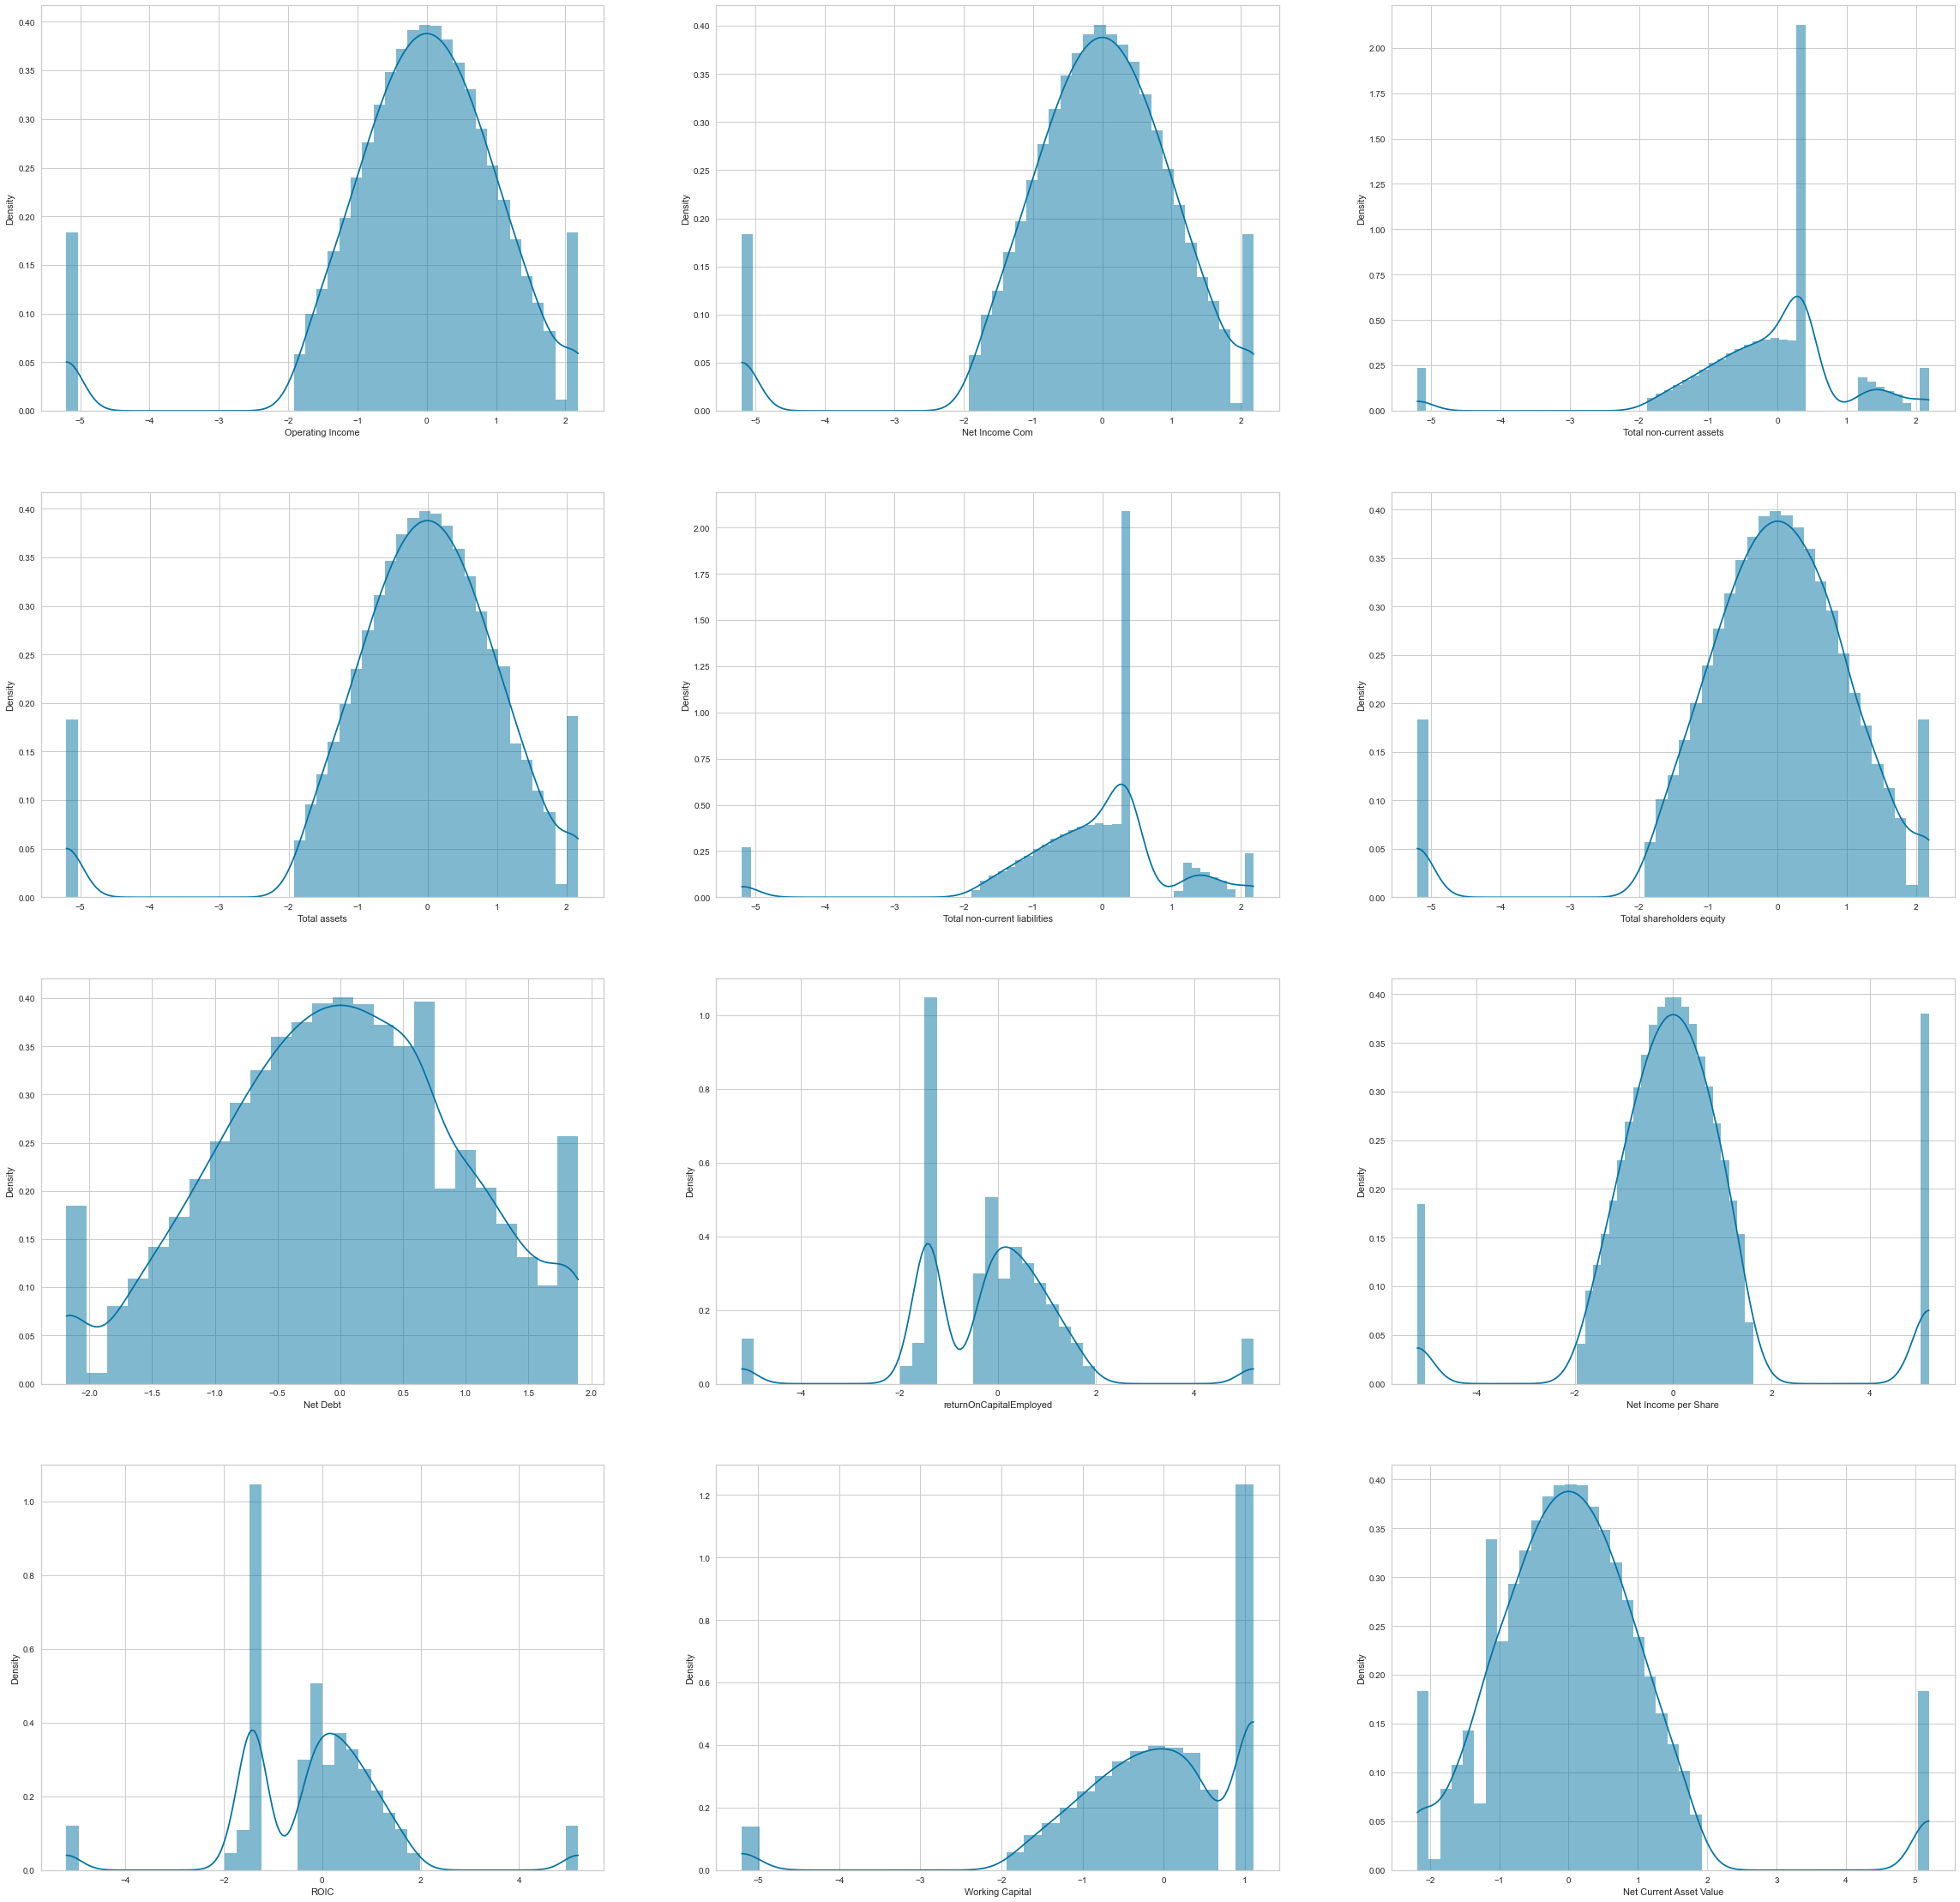

In [17]:
plotFeatures(df_scaled, 3,(40, 40))

### Split data into train and test sets

### Build models for Logistic Regression and K-NN <a class="anchor" id="BuildingModels"></a>

In [40]:
train_features, test_features, train_labels, test_labels = train_test_split(df_scaled, 
                                                                            target,
                                                                            random_state=0, 
                                                                            stratify=target)

In [41]:
solver = 'liblinear'
lrclf = LogisticRegression(solver=solver)
lrclf = lrclf.fit(train_features, train_labels)

y_predicted = lrclf.predict(test_features)
lr_score = metrics.accuracy_score(y_predicted, test_labels)
print("Logistic Regression ({}) score: {}".format(solver, lr_score))

knn_results=[]  
Training_Accuracy=[]
Testing_Accuracy=[]
for i in range(5, 300, 5):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(train_features, train_labels)            
    y_predicted = knn.predict(test_features)           
    knn_score = metrics.accuracy_score(y_predicted, test_labels)     
    knn_results.append([i, knn_score ])
    
    Training_Accuracy.append(knn.score(train_features, train_labels)*100)
    Testing_Accuracy.append(knn.score(test_features, test_labels)*100)  

Logistic Regression (liblinear) score: 0.7313296903460837


## Model Evaluation <a class="anchor" id="ModelEvaluation"></a>

In [42]:
knn_results = pd.DataFrame(knn_results, columns = ["K", "Score" ])   
knn_results_top3 = knn_results.sort_values(["Score"], ascending=False).head(3)
max_k_score = int(knn_results_top3.head(1).values[0][0])

dfKnn = pd.DataFrame({"Training" : Training_Accuracy, "Testing": Testing_Accuracy})

print("KNN scores (Top 3):")  
knn_results_top3

KNN scores (Top 3):


,K,Score
9,50,0.725865
33,170,0.724954
1,10,0.724954


In [43]:
max_k_score

50

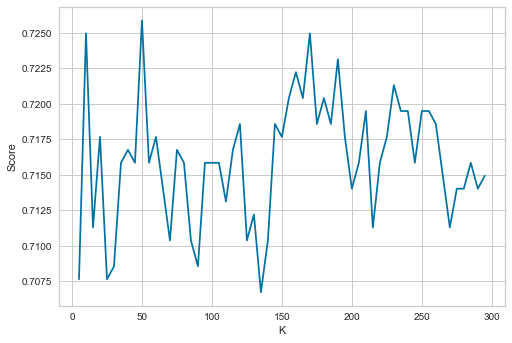

In [44]:
ax = sns.lineplot(x=knn_results['K'], y=knn_results['Score'])
plt.show()

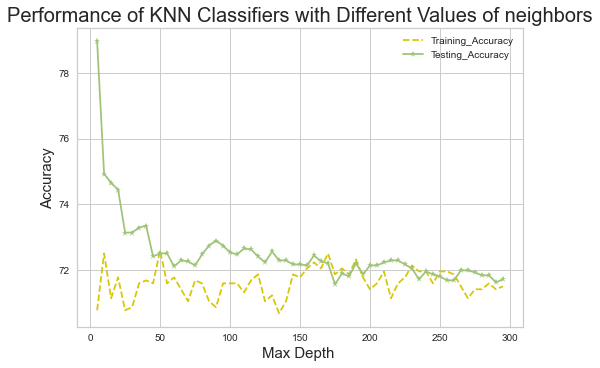

In [45]:
#plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(knn_results['K'], Testing_Accuracy, 'y--')
plt.plot(knn_results['K'], Training_Accuracy, 'g-*')
plt.title(
    'Performance of KNN Classifiers with Different Values of neighbors', fontsize=20)

plt.xlabel('Max Depth ', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(['Training_Accuracy', 'Testing_Accuracy'])
plt.show()


In [46]:
#df_scaled =  StandardScaler().fit_transform()

train_features, test_features, train_labels, test_labels = train_test_split(df_scaled, 
                                                                            target,
                                                                            random_state=0, 
                                                                            stratify=target)

lrclf = LogisticRegression(solver=solver)
lrclf = lrclf.fit(train_features, train_labels)

y_pred = lrclf.predict(test_features)
y = test_labels
error = (y - y_pred).rename('Prediction Errors')

Accuracy:  0.7313296903460837


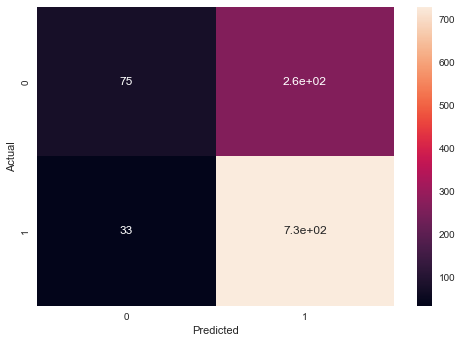

In [47]:
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y, y_pred))
plt.show()


In [48]:
#df_scaled = df_scaled.drop(["Net Income per Share"], axis =1 )

train_features, test_features, train_labels, test_labels = train_test_split(df_scaled, 
                                                                            target,
                                                                            random_state=0, 
                                                                            stratify=target)

knn = neighbors.KNeighborsClassifier(n_neighbors=max_k_score)
knn = knn.fit(train_features, train_labels)            
y_pred = knn.predict(test_features)     
y = test_labels
error = (y - y_pred).rename('Prediction Errors')

Accuracy:  0.7258652094717668


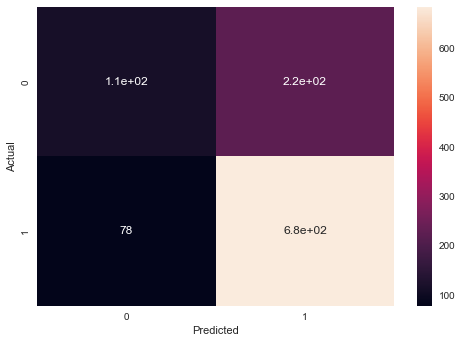

In [49]:
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y, y_pred))
plt.show()


In [50]:
from sklearn import tree
from sklearn.neural_network import MLPClassifier

train_features, test_features, train_labels, test_labels = train_test_split(df_scaled, 
                                                                            target,
                                                                            random_state=0, 
                                                                            stratify=target)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_labels)
results = clf.predict(test_features)

print(metrics.accuracy_score(results, test_labels))


clf = MLPClassifier(random_state=1, max_iter=3000).fit(train_features, train_labels)

results = clf.predict_proba(test_features)

print('With MLPClassifier')
# print(results)

# Returns the indices of the maximum values along an axis.
pred = np.argmax(results, axis=1)
# print("pred")
# print(pred)
print(metrics.accuracy_score(pred, test_labels))


0.6575591985428051
With MLPClassifier
0.7185792349726776
